In [359]:
! git clone https://github.com/DS3001/group10/

fatal: destination path 'group10' already exists and is not an empty directory.


In [360]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#target variable y is stroke (1 - yes, 0 - no)
#features of interests are 'smoking_status', 'residence_type', 'hypertension','heart_disease'
#treating it as clusters

In [361]:
#Importing data
df_test = pd.read_csv('/content/group10/project_2/data/testing_data.csv')
df = pd.read_csv('/content/group10/project_2/data/training_data.csv') #training set

In [362]:
df.head()

,Unnamed: 0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2465,68685,Male,36.0,0,0,Yes,Govt_job,Urban,65.87,32.2,formerly smoked,0
1,4311,59058,Female,45.0,0,0,Yes,Govt_job,Rural,68.66,25.3,never smoked,0
2,2375,46068,Male,58.0,0,0,No,Self-employed,Rural,170.93,30.7,Unknown,0
3,5017,36837,Female,61.0,0,0,Yes,Self-employed,Urban,69.88,27.1,never smoked,0
4,753,30550,Female,78.0,0,0,No,Private,Urban,103.86,30.6,Unknown,0


In [363]:
####Analyzing and Cleaning Data###

#Dropping unecessary data
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('id', axis = 1)
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('id', axis=1)

In [364]:
#Check data types
print(df.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [365]:
#Checking NAs
missing_values = df.isnull().sum()
print(missing_values) #there is 159 NAs for BMI

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  159
smoking_status         0
stroke                 0
dtype: int64


In [366]:
#Smoking status
df['smoking_status'].unique()
#drop unknown rows
df.loc[df['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan
df = df.dropna()
df['smoking_status'].unique()

df_test.loc[df_test['smoking_status'] == 'Unknown', 'smoking_status'] = np.nan
df_test = df_test.dropna()

In [367]:
#clean residence type
df['Residence_type'].unique() #pretty clean

array(['Urban', 'Rural'], dtype=object)

In [368]:
#clean hypertension and heart disease
df['hypertension'].unique()
df['heart_disease'].unique() #pretty clean

array([0, 1])

In [369]:
#making dummy values for smoking status and residence type
df['smoking_status'] = df['smoking_status'].replace({"never smoked":0, "formerly smoked":1, "smokes":2})
df['Residence_type'] = df['Residence_type'].replace({"Urban":0, "Rural":1})

df_test['smoking_status'] = df_test['smoking_status'].replace({"never smoked": 0, "formerly smoked": 1, "smokes": 2})
df_test['Residence_type'] = df_test['Residence_type'].replace({"Urban": 0, "Rural": 1})

In [370]:
X_train = df.loc[:, ['hypertension', 'heart_disease', 'Residence_type', 'smoking_status', 'stroke']]
X_test = df_test.loc[:, ['hypertension', 'heart_disease', 'Residence_type', 'smoking_status', 'stroke']]
print(X_test)

      hypertension  heart_disease  Residence_type  smoking_status  stroke
0                1              0               0               0       0
2                0              0               1               1       0
4                1              0               0               0       0
6                0              1               0               1       0
7                0              0               1               0       0
...            ...            ...             ...             ...     ...
1012             1              1               0               1       1
1015             0              0               0               0       1
1016             0              0               0               0       1
1019             0              0               0               0       1
1021             0              0               1               1       1

[693 rows x 5 columns]


In [371]:
###Getting Model Started###

def maxmin(x): # Max-min scaler function
    x = (x-min(x))/(max(x)-min(x))
    return x

X_train = X_train.apply(maxmin) # Normalize the data
X_test = X_test.apply(maxmin)

print(X_train)

      hypertension  heart_disease  Residence_type  smoking_status  stroke
0              0.0            0.0             0.0             0.5     0.0
1              0.0            0.0             1.0             0.0     0.0
3              0.0            0.0             0.0             0.0     0.0
5              0.0            0.0             0.0             1.0     0.0
6              1.0            1.0             0.0             0.0     0.0
...            ...            ...             ...             ...     ...
4082           0.0            0.0             0.0             0.0     1.0
4083           1.0            0.0             1.0             0.5     1.0
4084           0.0            0.0             1.0             0.0     1.0
4085           1.0            1.0             0.0             1.0     1.0
4086           0.0            0.0             0.0             0.5     1.0

[2733 rows x 5 columns]


Text(0.5, 1.0, 'Scree Plot')

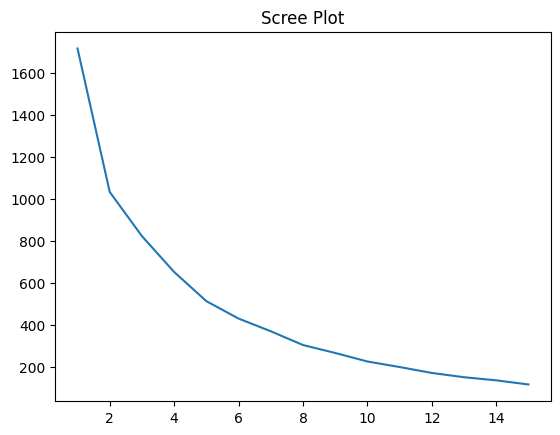

In [372]:
###Create SSE Plot###

k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(X_train)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
#looks like k=7 would be a good selection

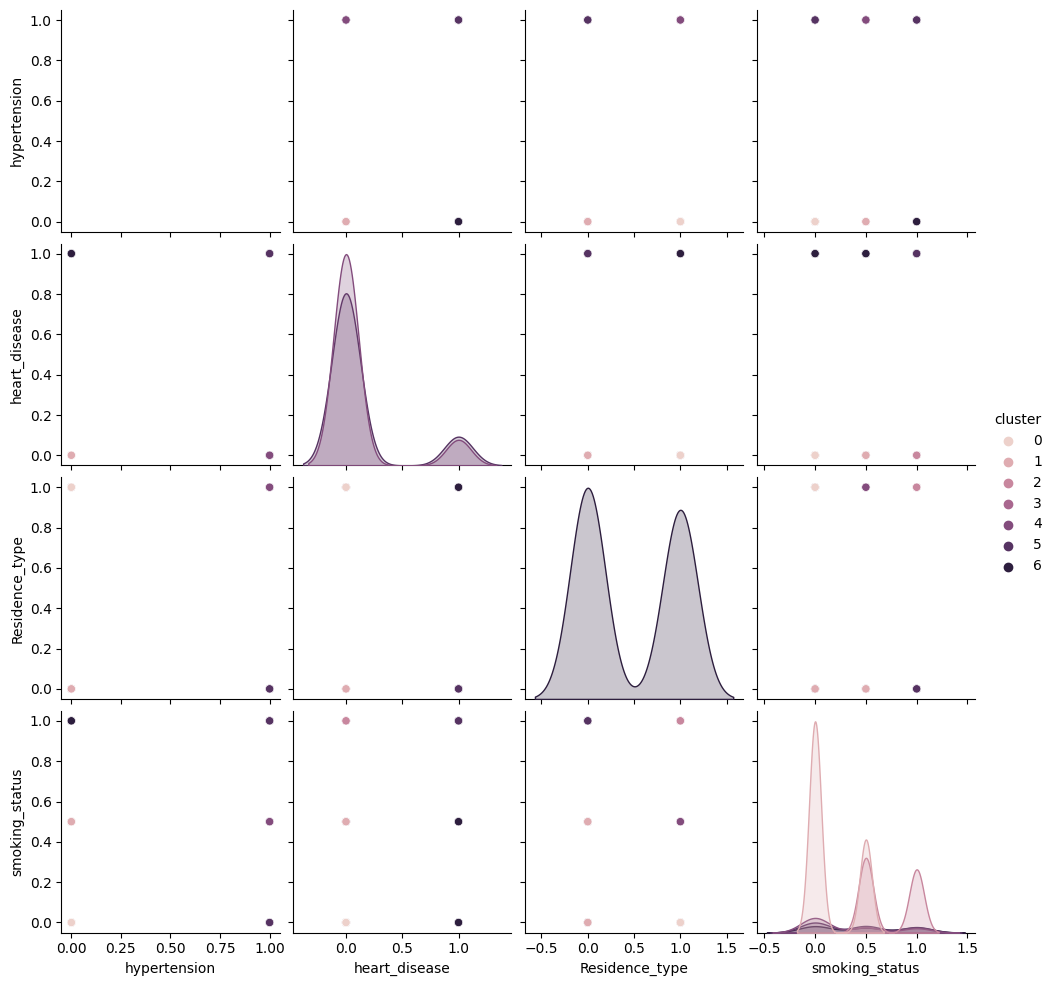

In [373]:
###Train the Model###
y_train = X_train['stroke'] #target variable
X_train = X_train.drop('stroke', axis = 1) #feature variables

y_test = X_test['stroke'] #target variable
X_test = X_test.drop('stroke', axis = 1) #feature variables

from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7, max_iter = 300, n_init = 10, random_state = 0) #creating the KMC model
model = model.fit(X_train) #fitting the model
X_train['cluster'] = model.fit_predict(X_train)
predicted_clusters = model.predict(X_test)

sns.pairplot(X_train, hue = 'cluster')

In [374]:
from sklearn.metrics import r2_score, mean_squared_error
# Calculate R-squared
r_squared = r2_score(y_test, predicted_clusters)
print(f"R-squared: {r_squared}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicted_clusters))
print(f"RMSE: {rmse}")


R-squared: -119.20909090909092
RMSE: 2.3348788944310264
